In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_moons
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

In [4]:
def plot_decision_boundary(X, y, model, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolor='k', cmap=plt.cm.Paired)
    plt.title(title)
    plt.show()

In [5]:
print("Training Linear SVM...")
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_clusters_per_class=1, n_informative=2, n_redundant=0, random_state=42)

Training Linear SVM...


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)

SVC(kernel='linear')

In [7]:
y_pred = linear_svm.predict(X_test)
print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Linear SVM Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



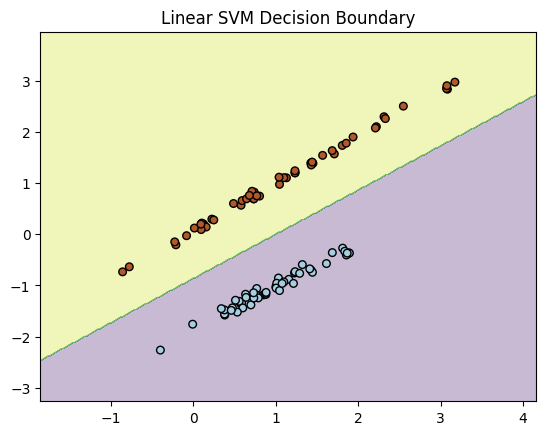

In [8]:
plot_decision_boundary(X, y, linear_svm, "Linear SVM Decision Boundary")

In [9]:
print("\nTraining Non-Linear SVM...")
X, y = make_moons(n_samples=100, noise=0.1, random_state=42)



Training Non-Linear SVM...


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
non_linear_svm = SVC(kernel='rbf', gamma='auto')
non_linear_svm.fit(X_train, y_train)

SVC(gamma='auto')

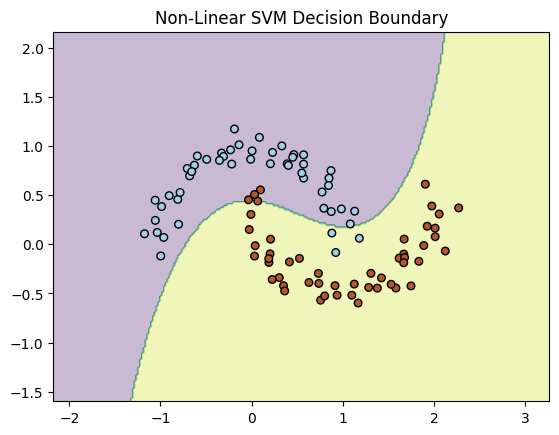

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

In [11]:
plot_decision_boundary(X, y, non_linear_svm, "Non-Linear SVM Decision Boundary")
plt.figure(figsize=(10, 4))

Text(0.5, 1.0, 'Linear SVM Confusion Matrix')

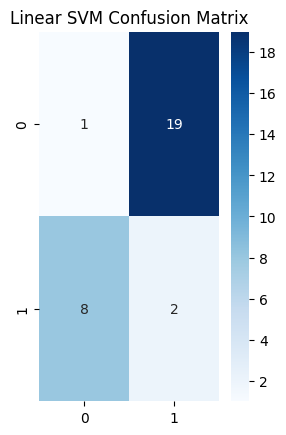

In [12]:
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, linear_svm.predict(X_test)), annot=True, cmap="Blues", fmt='d')
plt.title("Linear SVM Confusion Matrix")

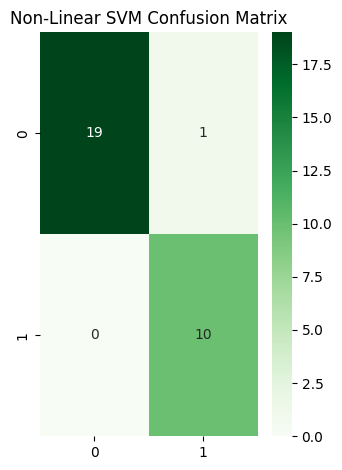

In [13]:
plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, non_linear_svm.predict(X_test)), annot=True, cmap="Greens", fmt='d')
plt.title("Non-Linear SVM Confusion Matrix")
plt.tight_layout()
plt.show()